In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve

#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.neighbors import DistanceMetric

# explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
# now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from  sklearn.preprocessing import OneHotEncoder

import seaborn as sns


import matplotlib.pyplot as plt
from scipy.io import arff

from sklearn import svm

def prune(decisiontree, min_samples_leaf = 1):
    if decisiontree.min_samples_leaf >= min_samples_leaf:
        raise Exception('Tree already more pruned')
    else:
        decisiontree.min_samples_leaf = min_samples_leaf
        tree = decisiontree.tree_
        for i in range(tree.node_count):
            n_samples = tree.n_node_samples[i]
            if n_samples <= min_samples_leaf:
                tree.children_left[i]=-1
                tree.children_right[i]=-1
    
def trString(df, col):
    df[col] = tfidf_vectorizer.fit_transform(df[col].astype(str)).toarray()
    return df

training_score = 'training score'
cross_validation_score = 'cross validation score'
y_label = 'fl score'

np.random.seed(3141531) 
tfidf_vectorizer = TfidfVectorizer(token_pattern=r"(?u)\b\w+\b", stop_words=None)
pd.set_option('display.max_columns', None)


file = "income_data_final.csv"
df = pd.read_csv(file)
df = df.sample(frac=1).reset_index(drop=True)

#df = pd.DataFrame(data[0])
features = ['age', 'workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'education-num']

x_features = df[features]

onehotencoder = OneHotEncoder(categorical_features = [1,3,4,5,6,7,8,9])
x_features = onehotencoder.fit_transform(x_features).toarray()

y_predict = df.y_predict

#.1024
#x_g,x_hypertune, y_g, y_hypertune  = train_test_split(x_features, y_predict, test_size=0.1024, random_state=143)
x_train, x_test, y_train, y_test = train_test_split(x_features, y_predict, test_size=0.3, random_state=143)
x_g,x_hypertune, y_g, y_hypertune = train_test_split(x_train, y_train, test_size=0.2, random_state=122)

# x_train1_standard = (x_train1-np.mean(x_train1))/np.std(x_train1)
# x_val1_standard = (x_val1-np.mean(x_train1))/np.std(x_train1)
# x_test_standard = (x_test-np.mean(x_train1))/np.std(x_train1)


train_sizes_lc = [150, 600, 1300, 3200, 10000, 24000]
train_sizes = [12, 30, 300, 1000, 2000, 5000]
train_sizes3 = [100, 200, 300, 1000, 2000, 5000]

len(x_hypertune)

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


6838

       Unnamed: 0  age  workclass  fnlwgt  marital-status  occupation  \
0            9159   42          4   16402               0           3   
1            3106    4          4   13050               1           5   
2            1702   28          4   15797               1           8   
3           15541   42          4    1788               0          14   
4           22474   22          7   15138               2           4   
...           ...  ...        ...     ...             ...         ...   
48837       47608   21          7    7820               0          10   
48838       42670   13          4   10804               2           1   
48839       24981   23          7     910               0           3   
48840       40089   30          4    9742               2           8   
48841       33745   53          5   14971               0           4   

       relationship  race  gender  capital-gain  capital-loss  hours-per-week  \
0                 0     4       1         

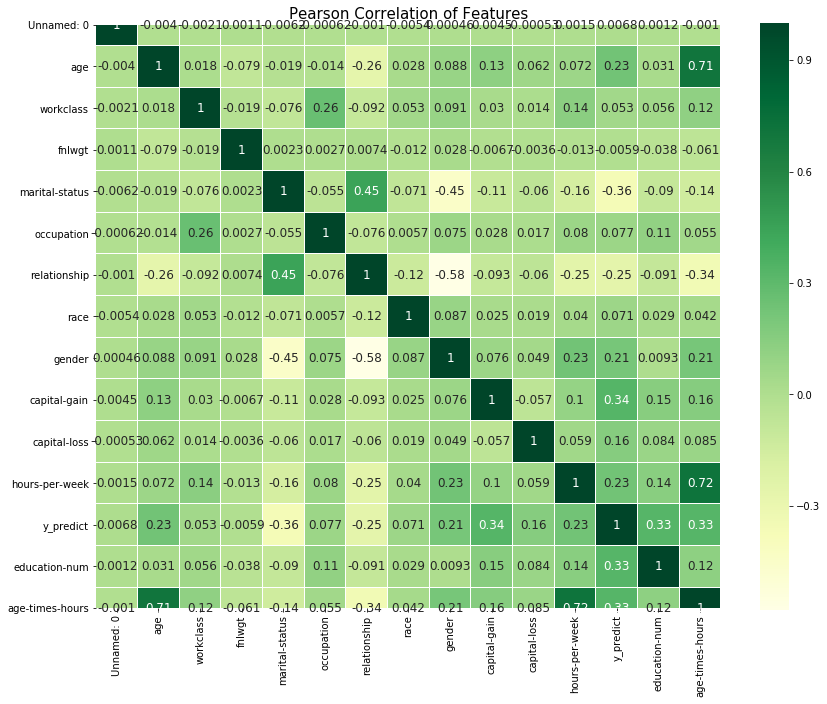

In [3]:

#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = "YlGn",
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(df)

df.head

print(df)

In [4]:
display(x_train)

## 35500 over 50k
## 12500 under 50k

array([[ 0.,  0.,  0., ..., 31.,  0., 13.],
       [ 0.,  0.,  0., ..., 15.,  0.,  8.],
       [ 0.,  0.,  0., ..., 14.,  1.,  9.],
       ...,
       [ 0.,  0.,  0., ..., 46.,  0., 13.],
       [ 0.,  0.,  1., ..., 25.,  0., 11.],
       [ 0.,  0.,  0., ..., 28.,  1.,  9.]])

Training scores:

 [[0.88888889 0.81355932 0.81355932 0.81355932 0.81355932]
 [0.67357513 0.63888889 0.63888889 0.63888889 0.63888889]
 [0.65125241 0.62396694 0.62396694 0.62396694 0.62396694]
 [0.60645161 0.56794425 0.56794425 0.56794425 0.56794425]
 [0.55844156 0.64892269 0.57751233 0.57751233 0.57751233]
 [0.59260789 0.58725248 0.58245688 0.53403261 0.57774455]]

 ----------------------------------------------------------------------

Validation scores:

 [[0.34536505 0.55562027 0.53832651 0.51830161 0.56428361]
 [0.53684612 0.52237094 0.52910053 0.53924146 0.53464597]
 [0.57349747 0.56254572 0.52876106 0.55839416 0.5755237 ]
 [0.55705996 0.53720653 0.5204284  0.54765625 0.5484127 ]
 [0.55581216 0.62904718 0.54836253 0.55778704 0.56380952]
 [0.59489051 0.57647059 0.56602374 0.53528945 0.57509434]]


(0.0, 1.0)

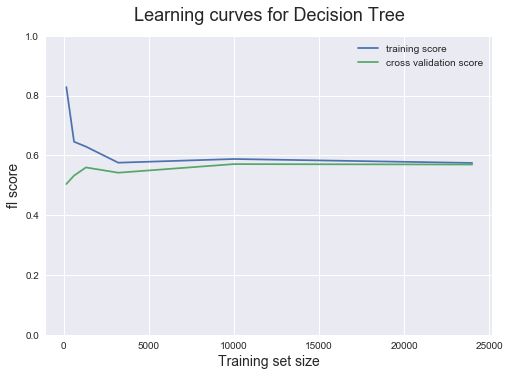

In [5]:
###### DecisionTree Learning Curve####################
#########################################
clf = tree.DecisionTreeClassifier(max_depth=5, criterion='entropy', min_samples_split=2)  

train_sizes, train_scores, validation_scores = learning_curve(
estimator = clf,
X = x_train,
y = y_train, train_sizes = train_sizes_lc, cv = 5,
scoring = 'f1',
n_jobs=5)

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)


plt.style.use('seaborn')
plt.plot(train_sizes_lc, train_scores_mean, label = training_score)
plt.plot(train_sizes_lc, validation_scores_mean, label = cross_validation_score)
plt.ylabel(y_label, fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for Decision Tree', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.0,1.0)

(0.0, 1.0)

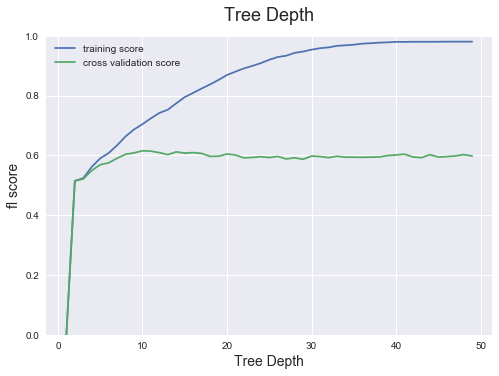

In [6]:
####HYPERPARM TREE DEPTH #####

depth = range(1,50)
new_clf = tree.DecisionTreeClassifier(max_depth=5, criterion='entropy')  
train_scores, validation_scores = validation_curve(
estimator = new_clf,
param_name = "max_depth",
param_range = depth,
X = x_hypertune,
y = y_hypertune, cv = 5,
scoring = 'f1',
n_jobs=5)

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

# print('Training scores:\n\n', train_scores)
# print('\n', '-' * 70) # separator to make the output easy to read
# print('\nValidation scores:\n\n', validation_scores)

plt.style.use('seaborn')
plt.plot(depth, train_scores_mean, label = training_score)
plt.plot(depth, validation_scores_mean, label = cross_validation_score)
plt.ylabel(y_label, fontsize = 14)
plt.xlabel('Tree Depth', fontsize = 14)
plt.title('Tree Depth', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.0,1.0)

Training scores:

 [[0.         0.         0.         0.         0.        ]
 [0.51254304 0.51036525 0.51522716 0.53007335 0.50667986]
 [0.51254304 0.51036525 0.51522716 0.53007335 0.50667986]
 [0.51254304 0.51036525 0.51522716 0.53007335 0.50667986]
 [0.51254304 0.51036525 0.51522716 0.55244423 0.52884615]
 [0.51254304 0.51036525 0.51522716 0.59893048 0.58333333]
 [0.51254304 0.51036525 0.53879941 0.59893048 0.58333333]
 [0.53288526 0.5285576  0.53879941 0.59893048 0.58333333]
 [0.57739446 0.5285576  0.55362319 0.59893048 0.58333333]
 [0.57739446 0.5285576  0.56609195 0.63414634 0.59466667]
 [0.57739446 0.54266539 0.56609195 0.63414634 0.59840426]
 [0.57739446 0.54266539 0.56609195 0.63414634 0.59840426]
 [0.58254184 0.54266539 0.56609195 0.63414634 0.59840426]
 [0.58510158 0.54580521 0.57564225 0.63414634 0.59840426]
 [0.58748867 0.63483146 0.57564225 0.63414634 0.62964509]
 [0.59513075 0.63483146 0.57767221 0.63414634 0.62964509]
 [0.59513075 0.64828673 0.57767221 0.62761864 0.62964

(0.0, 1.0)

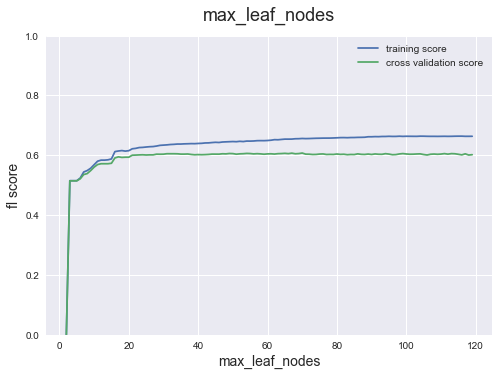

In [7]:
####HYPERPARM max_leaf_nodes #####

depth = range(2,120)
new_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=8)  
train_scores, validation_scores = validation_curve(
estimator = new_clf,
param_name = "max_leaf_nodes",
param_range = depth,
X = x_hypertune,
y = y_hypertune, cv = 5,
scoring = 'f1',n_jobs=5)

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

plt.style.use('seaborn')
plt.plot(depth, train_scores_mean, label = training_score)
plt.plot(depth, validation_scores_mean, label = cross_validation_score)
plt.ylabel(y_label, fontsize = 14)
plt.xlabel('max_leaf_nodes', fontsize = 14)
plt.title('max_leaf_nodes', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.0,1.0)

In [8]:
####model FINAL TEST 1 ######################
#######FINAL FOR DECISON TREE ###############
clf = tree.DecisionTreeClassifier(max_depth=8, min_samples_leaf=10, criterion='entropy', max_leaf_nodes=20)  

clf = clf.fit(x_train,y_train)
#prune(clf)
y_pred_test = clf.predict(x_test)

feat_importance = clf.tree_.compute_feature_importances(normalize=False)
# print("feat importance = " + str(feat_importance))


#print("fl validation set:",metrics.accuracy_score(y_val1, y_pred_val))
print("accuracy test set:",metrics.accuracy_score(y_test, y_pred_test))

metrics.classification_report(y_test, y_pred_test, output_dict = True)

accuracy test set: 0.8397597761550536


{'0': {'precision': 0.868736291547157,
  'recall': 0.9285843101893598,
  'f1-score': 0.8976638772663877,
  'support': 11090},
 '1': {'precision': 0.7170418006430869,
  'recall': 0.5632893628964356,
  'f1-score': 0.6309336686576549,
  'support': 3563},
 'accuracy': 0.8397597761550536,
 'macro avg': {'precision': 0.7928890460951219,
  'recall': 0.7459368365428978,
  'f1-score': 0.7642987729620213,
  'support': 14653},
 'weighted avg': {'precision': 0.8318505022145151,
  'recall': 0.8397597761550536,
  'f1-score': 0.8328061871501716,
  'support': 14653}}

(0.0, 1.0)

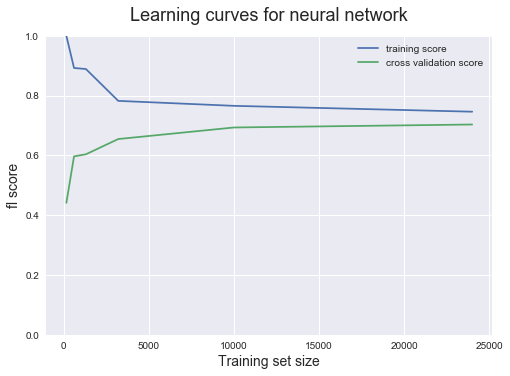

In [9]:
########NN Learning Curve ####################
###########################################
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(9, 8), 
random_state=44, learning_rate='adaptive', max_iter=1000, n_iter_no_change=200)

train_sizes, train_scores, validation_scores = learning_curve(
estimator = clf,
X = x_train,
y = y_train, train_sizes = train_sizes_lc, cv = 5,
scoring = 'f1',
n_jobs=5)

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

# print('Training scores:\n\n', train_scores)
# print('\n', '-' * 70) # separator to make the output easy to read
# print('\nValidation scores:\n\n', validation_scores)


plt.style.use('seaborn')
plt.plot(train_sizes_lc, train_scores_mean, label = training_score)
plt.plot(train_sizes_lc, validation_scores_mean, label = cross_validation_score)
plt.ylabel(y_label, fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for neural network', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.0,1.0)

Training scores:

 [[0.64212999 0.63086172 0.62039417 0.64299803 0.62119367]
 [0.64212999 0.63690241 0.63412633 0.64316832 0.61941827]
 [0.64330709 0.64       0.63591837 0.64800946 0.62094456]
 [0.64209275 0.64495881 0.63683998 0.64655172 0.6185738 ]
 [0.63410663 0.65252603 0.64901186 0.64160401 0.62285475]
 [0.63610548 0.64932039 0.64924782 0.65976096 0.62751678]
 [0.63558979 0.65883217 0.6504     0.65954923 0.65479018]
 [0.63273616 0.64969697 0.65668112 0.65605096 0.65495208]
 [0.63192182 0.65234686 0.64486373 0.65683539 0.65495208]
 [0.62906546 0.65129225 0.66508689 0.65788423 0.65336846]
 [0.62634631 0.65129225 0.65367438 0.66214058 0.65356455]
 [0.62562396 0.65045835 0.65397083 0.65700483 0.65099882]
 [0.62468724 0.64656212 0.65425101 0.65640194 0.64854058]
 [0.62489557 0.64398542 0.65103114 0.65640194 0.63781135]
 [0.6251046  0.63706096 0.65048544 0.65931373 0.63925081]
 [0.63459916 0.63706096 0.64991896 0.66666667 0.63341444]
 [0.6394052  0.63188406 0.64991896 0.66640316 0.63367

(0.0, 1.0)

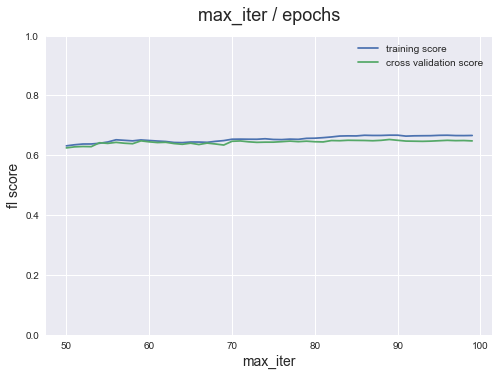

In [10]:
#### NN Hyperparam 1 ######

max_iter = range(50, 100)
new_clf = MLPClassifier(activation='tanh', solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(9, 8), random_state=1, learning_rate='adaptive')

train_scores, validation_scores = validation_curve(
estimator = new_clf,
param_name = "max_iter",
param_range = max_iter,
X = x_hypertune,
y = y_hypertune, cv = 5,
scoring = 'f1',
n_jobs=5)

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

plt.style.use('seaborn')
plt.plot(max_iter, train_scores_mean, label = training_score)
plt.plot(max_iter, validation_scores_mean, label = cross_validation_score)
plt.ylabel(y_label, fontsize = 14)
plt.xlabel('max_iter', fontsize = 14)
plt.title('max_iter / epochs', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.0,1.0)

Training scores:

 [[0.68471592 0.68807839]
 [0.6912114  0.69958742]
 [0.68938132 0.68253551]
 [0.69430192 0.69292605]
 [0.68222912 0.69019187]
 [0.67272219 0.68253095]
 [0.6708233  0.69372294]
 [0.68447458 0.        ]
 [0.67848172 0.68751678]
 [0.68162539 0.68954467]
 [0.66311085 0.687517  ]
 [0.56797642 0.69321534]
 [0.68391358 0.69345119]
 [0.69545394 0.68980303]
 [0.68862681 0.68427535]
 [0.68751685 0.69129431]
 [0.67646651 0.68058002]
 [0.67567568 0.69210245]
 [0.6770428  0.68891281]
 [0.68515012 0.69704953]
 [0.68197597 0.68550401]
 [0.68995633 0.69340974]
 [0.68625051 0.69386107]
 [0.68357921 0.69090909]
 [0.68714012 0.69627237]
 [0.57494996 0.68655914]
 [0.68374464 0.69747448]
 [0.6874066  0.69764363]
 [0.68781484 0.69981486]
 [0.68466994 0.69306122]
 [0.68873085 0.68559671]
 [0.68911574 0.6871726 ]
 [0.68339076 0.69366815]
 [0.68791856 0.68589916]
 [0.68129457 0.69224556]
 [0.6876598  0.69753668]
 [0.69265245 0.69009415]
 [0.68433087 0.69268814]
 [0.68366938 0.69784846]
 [0.68

(0.0, 1.0)

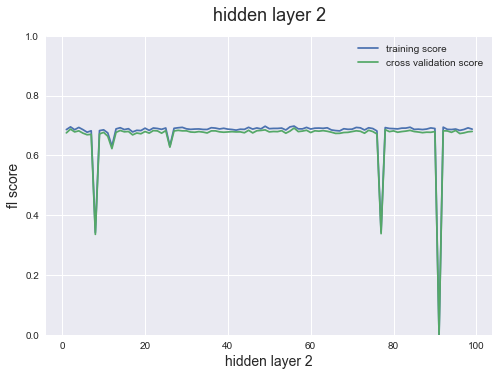

In [11]:
# ##### NN Hyperparam 2 ######
l = list()
max_size = 100
for i in range(1,max_size): #5,7,8
    l.append((9, i))


new_clf = MLPClassifier(activation='tanh', solver='lbfgs', alpha=1e-5,random_state=1, learning_rate='adaptive')
train_scores, validation_scores = validation_curve(
estimator = new_clf,
param_name = "hidden_layer_sizes",
param_range = l,
X = x_train,
y = y_train, cv = 2,
scoring = 'f1',n_jobs=5)

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

for i in range(0,len(l)):
    print(l[i], validation_scores[i])

plt.style.use('seaborn')
plt.plot(range(1,max_size), train_scores_mean, label = training_score)
plt.plot(range(1,max_size), validation_scores_mean, label = cross_validation_score)
plt.ylabel(y_label, fontsize = 14)
plt.xlabel('hidden layer 2', fontsize = 14)
plt.title('hidden layer 2', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.0,1.0)

In [12]:
####model FINAL TEST 2 ####################
#######FINAL FOR Neural Net ###############
clf = MLPClassifier(activation='tanh', solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(9, 8), random_state=1, learning_rate='constant', max_iter=200)
clf.fit(x_train, y_train)

#y_pred_val = clf.predict(x_val1)
y_pred_test = clf.predict(x_test)

print("Accuracy test set:",metrics.accuracy_score(y_test, y_pred_test))

metrics.classification_report(y_test, y_pred_test, output_dict = True)


Accuracy test set: 0.8609840988193544


{'0': {'precision': 0.8865169498761848,
  'recall': 0.9361587015329126,
  'f1-score': 0.9106618130783738,
  'support': 11090},
 '1': {'precision': 0.7593473827328348,
  'recall': 0.6269997193376369,
  'f1-score': 0.6868562644119908,
  'support': 3563},
 'accuracy': 0.8609840988193544,
 'macro avg': {'precision': 0.8229321663045097,
  'recall': 0.7815792104352748,
  'f1-score': 0.7987590387451823,
  'support': 14653},
 'weighted avg': {'precision': 0.8555946017064069,
  'recall': 0.8609840988193544,
  'f1-score': 0.8562416144911683,
  'support': 14653}}

(0.0, 1.0)

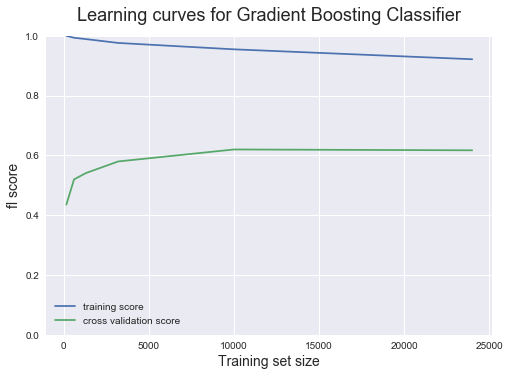

In [13]:
##TREE WITH BOOSTING Learning Curve#########
############################################
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=.01,
    max_depth=30, random_state=0)

# print('Training scores:\n\n', train_scores)
# print('\n', '-' * 70) # separator to make the output easy to read
# print('\nValidation scores:\n\n', validation_scores)

train_sizes, train_scores, validation_scores = learning_curve(
estimator = clf,
X = x_train, cv = 5,
y = y_train, train_sizes = train_sizes_lc,
scoring = 'f1',
n_jobs=5)

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

# print('Training scores:\n\n', train_scores)
# print('\n', '-' * 70) # separator to make the output easy to read
# print('\nValidation scores:\n\n', validation_scores)

plt.style.use('seaborn')
plt.plot(train_sizes_lc, train_scores_mean, label = training_score)
plt.plot(train_sizes_lc, validation_scores_mean, label = cross_validation_score)
plt.ylabel(y_label, fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for Gradient Boosting Classifier', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.0,1.0)

(0.0, 1.0)

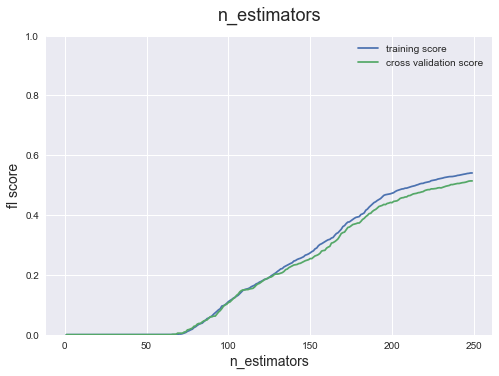

In [15]:
clf = GradientBoostingClassifier(n_estimators=1, learning_rate=.01,
    max_depth=5, random_state=3, max_leaf_nodes=20, max_features='sqrt')#.fit(x_train1, y_train1)
n_est = range(1,250)

train_scores, validation_scores = validation_curve(
estimator = clf,
param_name = "n_estimators",
param_range = n_est,
X = x_hypertune,
y = y_hypertune, cv = 5,
scoring = 'f1',
n_jobs=5)

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

# print('Training scores:\n\n', train_scores)
# print('\n', '-' * 70) # separator to make the output easy to read
# print('\nValidation scores:\n\n', validation_scores)

plt.style.use('seaborn')
plt.plot(n_est, train_scores_mean, label = training_score)
plt.plot(n_est, validation_scores_mean, label = cross_validation_score)
plt.ylabel(y_label, fontsize = 14)
plt.xlabel('n_estimators', fontsize = 14)
plt.title('n_estimators', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.0,1.0)

(0.0, 1.0)

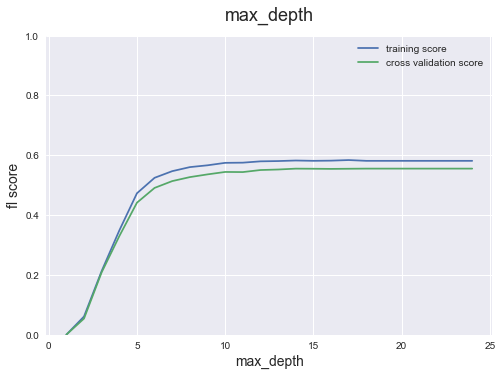

In [16]:
clf = GradientBoostingClassifier(n_estimators=200, learning_rate=.01,
max_depth=25, random_state=3,max_leaf_nodes=20, max_features='sqrt')
                                 
max_depth = range(1,25)

train_scores, validation_scores = validation_curve(
estimator = clf,
param_name = "max_depth",
param_range = max_depth,
X = x_hypertune,
y = y_hypertune, cv = 5,
scoring = 'f1',
n_jobs=5)

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

# print('Training scores:\n\n', train_scores)
# print('\n', '-' * 70) # separator to make the output easy to read
# print('\nValidation scores:\n\n', validation_scores)

plt.style.use('seaborn')
plt.plot(max_depth, train_scores_mean, label = training_score)
plt.plot(max_depth, validation_scores_mean, label = cross_validation_score)
plt.ylabel(y_label, fontsize = 14)
plt.xlabel('max_depth', fontsize = 14)
plt.title('max_depth', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.0,1.0)

In [19]:
####model FINAL TEST 3 ####################
#######FINAL FOR boosting #################
clf = GradientBoostingClassifier(n_estimators=200, learning_rate=.001,
    max_depth=10, random_state=3, max_features='sqrt', max_leaf_nodes=20).fit(x_train, y_train)


#y_pred_val = clf.predict(x_val1)
y_pred_test = clf.predict(x_test)

#print("Accuracy validation set:",metrics.accuracy_score(y_val1, y_pred_val))
print("Accuracy test set:",metrics.accuracy_score(y_test, y_pred_test))

metrics.classification_report(y_test, y_pred_test, output_dict = True)



Accuracy test set: 0.7568416024022384


/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


{'0': {'precision': 0.7568416024022384,
  'recall': 1.0,
  'f1-score': 0.8615934428776755,
  'support': 11090},
 '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 3563},
 'accuracy': 0.7568416024022384,
 'macro avg': {'precision': 0.3784208012011192,
  'recall': 0.5,
  'f1-score': 0.43079672143883774,
  'support': 14653},
 'weighted avg': {'precision': 0.572809211126788,
  'recall': 0.7568416024022384,
  'f1-score': 0.6520897619268015,
  'support': 14653}}

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


(0.0, 1.0)

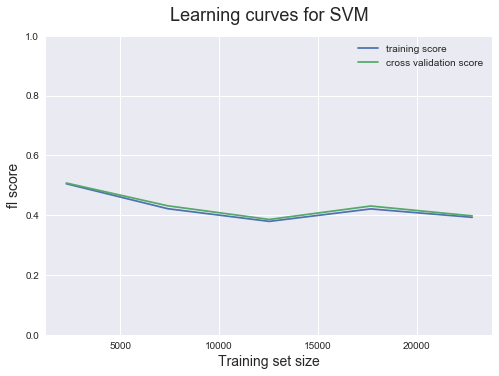

In [20]:
##### SVM #################
####################################

clf = svm.SVC(gamma='auto', kernel='rbf', decision_function_shape='ovr', max_iter=200) ##nu=.5542

train_sizes, train_scores, validation_scores = learning_curve(
estimator = clf,
X = x_train,
y = y_train, #train_sizes = train_sizes3, cv = 5,
scoring = 'f1',
n_jobs=5)

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

# print('Training scores:\n\n', train_scores)
# print('\n', '-' * 70) # separator to make the output easy to read
# print('\nValidation scores:\n\n', validation_scores)


plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = training_score)
plt.plot(train_sizes, validation_scores_mean, label = cross_validation_score)
plt.ylabel(y_label, fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for SVM', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.0,1.0)


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


(0.0, 1.1)

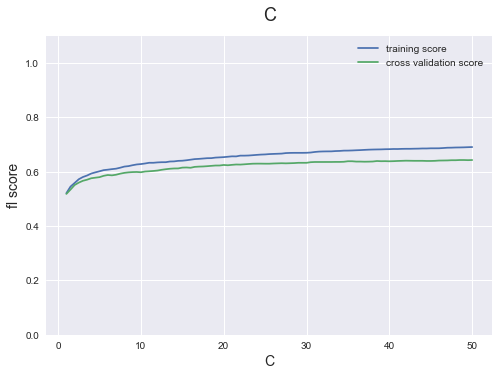

In [22]:
## nu between .01 and .94
###############SVM HYPERPARAM 1 ##################
clf = svm.SVC(gamma='auto', kernel='rbf', decision_function_shape='ovr', C =1.0)
                                 
C = []
v = 1.0
for i in range(1, 100):
    C.append(v)
    v = v + .5
    

train_scores, validation_scores = validation_curve(
estimator = clf,
param_name = 'C',
param_range = C,
X = x_hypertune,
y = y_hypertune, #cv = 5,
scoring = 'f1',n_jobs=5)

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

# print('Training scores:\n\n', train_scores)
# print('\n', '-' * 70) # separator to make the output easy to read
# print('\nValidation scores:\n\n', validation_scores)

plt.style.use('seaborn')
plt.plot(C, train_scores_mean, label = training_score)
plt.plot(C, validation_scores_mean, label = cross_validation_score)
plt.ylabel(y_label, fontsize = 14)
plt.xlabel('C', fontsize = 14)
plt.title('C', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.0,1.1)


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


(0.0, 1.1)

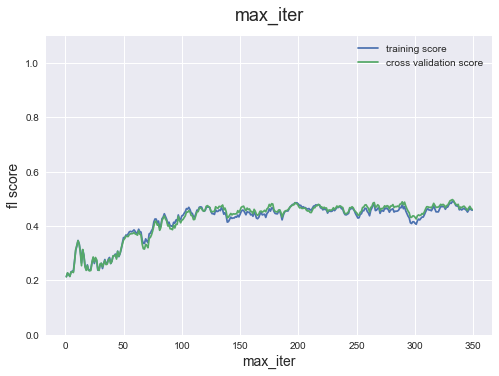

In [23]:
## C between .01 and .94
###############SVM HYPERPARAM 2 ##################
clf = svm.SVC(gamma='auto', kernel='rbf', decision_function_shape='ovo', C =1.0)
                                 
max_iter = range(1,350)


train_scores, validation_scores = validation_curve(
estimator = clf,
param_name = 'max_iter',
param_range = max_iter,
X = x_hypertune,
y = y_hypertune, #cv = 5,
scoring = 'f1', n_jobs=5)

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

# print('Training scores:\n\n', train_scores)
# print('\n', '-' * 70) # separator to make the output easy to read
# print('\nValidation scores:\n\n', validation_scores)

plt.style.use('seaborn')
plt.plot(max_iter, train_scores_mean, label = training_score)
plt.plot(max_iter, validation_scores_mean, label = cross_validation_score)
plt.ylabel(y_label, fontsize = 14)
plt.xlabel('max_iter', fontsize = 14)
plt.title('max_iter', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.0,1.1)


In [24]:
###############SVM HYPERPARAM 2 ##################

In [25]:
####model FINAL TEST 4 #####################
#######FINAL FOR SVM #######################
#clf = svm.SVC(gamma='scale', C=100000, kernel='rbf', shrinking=True, decision_function_shape='ovo') ##nu=.5542
clf = svm.SVC(gamma='scale', kernel='rbf', shrinking=True, decision_function_shape='ovo', C =2.0)
clf.fit(x_train, y_train)  
#y_pred_val = clf.predict(x_val)
y_pred_test = clf.predict(x_test)

#print("Accuracy validation set:",metrics.accuracy_score(y_val, y_pred_val))
print("Accuracy test set:",metrics.accuracy_score(y_test, y_pred_test))

metrics.classification_report(y_test, y_pred_test, output_dict = True)

Accuracy test set: 0.8489046611615368


{'0': {'precision': 0.8602857606754343,
  'recall': 0.9555455365193868,
  'f1-score': 0.905416951469583,
  'support': 11090},
 '1': {'precision': 0.788865096359743,
  'recall': 0.5169800729722144,
  'f1-score': 0.6246185147507629,
  'support': 3563},
 'accuracy': 0.8489046611615368,
 'macro avg': {'precision': 0.8245754285175886,
  'recall': 0.7362628047458006,
  'f1-score': 0.765017733110173,
  'support': 14653},
 'weighted avg': {'precision': 0.8429192263850631,
  'recall': 0.8489046611615368,
  'f1-score': 0.8371384535490782,
  'support': 14653}}

(0.0, 1.1)

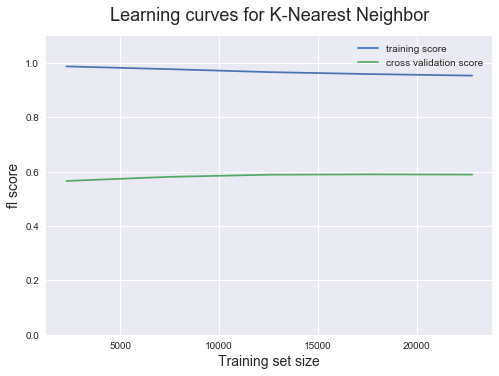

In [26]:
## KNN Learning Cruve######################
# ############################################
#train_sizes = [12, 30, 300, 3000, 10000, 24000]
clf = KNeighborsClassifier(algorithm = 'brute', metric='manhattan', weights='distance', n_neighbors=12)
# clf.fit(x_train1, y_train1)  
# y_pred_val = clf.predict(x_val1)
# y_pred_test = clf.predict(x_test)

# print("Accuracy validation set:",metrics.accuracy_score(y_val1, y_pred_val))
# print("Accuracy test set:",metrics.accuracy_score(y_test, y_pred_test))

# metrics.classification_report(y_test, y_pred_test, output_dict = True)

train_sizes, train_scores, validation_scores = learning_curve(
estimator = clf,
X = x_train,
y = y_train, cv = 5,
scoring = 'f1',train_sizes = train_sizes, 
n_jobs=5) #

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

# print('Training scores:\n\n', train_scores)
# print('\n', '-' * 70) # separator to make the output easy to read
# print('\nValidation scores:\n\n', validation_scores)

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = training_score)
plt.plot(train_sizes, validation_scores_mean, label = cross_validation_score)
plt.ylabel(y_label, fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for K-Nearest Neighbor', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.0,1.1)


In [27]:
print(y_hypertune)

45357    0
19088    0
30192    0
6178     1
23575    0
        ..
11838    0
40787    0
40910    0
8729     1
31882    0
Name: y_predict, Length: 6838, dtype: int64


Training scores:

 [[0.97791554 0.97560976 0.97784687 0.97948122 0.98217054]
 [0.9778831  0.97663366 0.97863924 0.98110236 0.98230436]
 [0.97927259 0.97639654 0.97954367 0.98193244 0.98313064]
 [0.97994495 0.97747926 0.97989752 0.98193244 0.98313064]
 [0.97994495 0.97747926 0.97989752 0.98193244 0.98313064]
 [0.97994495 0.97747926 0.97989752 0.98193244 0.98313064]
 [0.97994495 0.97747926 0.97989752 0.98193244 0.98313064]
 [0.97994495 0.97747926 0.97989752 0.98193244 0.98313064]
 [0.97994495 0.97747926 0.97989752 0.98193244 0.98313064]
 [0.97994495 0.97747926 0.97989752 0.98193244 0.98313064]
 [0.97994495 0.97747926 0.97989752 0.98193244 0.98313064]
 [0.97994495 0.97747926 0.97989752 0.98193244 0.98313064]
 [0.97994495 0.97747926 0.97989752 0.98193244 0.98313064]
 [0.97994495 0.97747926 0.97989752 0.98193244 0.98313064]
 [0.97994495 0.97747926 0.97989752 0.98193244 0.98313064]
 [0.97994495 0.97747926 0.97989752 0.98193244 0.98313064]
 [0.97994495 0.97747926 0.97989752 0.98193244 0.98313

(0.0, 1.0)

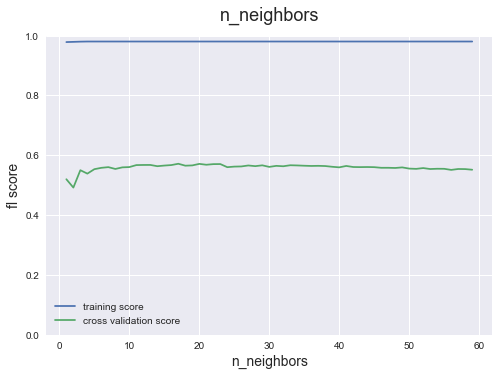

In [29]:
####KNN Hyperparam 1####

n_neighbors = range(1,60)
clf = KNeighborsClassifier(algorithm = 'brute', metric='manhattan', weights='distance', n_neighbors=12)
    

train_scores, validation_scores = validation_curve(
estimator = clf,
param_name = 'n_neighbors',
param_range = n_neighbors,
cv = 5,
X = x_hypertune,
y = y_hypertune,
scoring = 'f1',
n_jobs=5)

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

plt.style.use('seaborn')
plt.plot(n_neighbors, train_scores_mean, label = training_score)
plt.plot(n_neighbors, validation_scores_mean, label = cross_validation_score)
plt.ylabel(y_label, fontsize = 14)
plt.xlabel('n_neighbors', fontsize = 14)
plt.title('n_neighbors', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.0,1.0)


(0.0, 1.0)

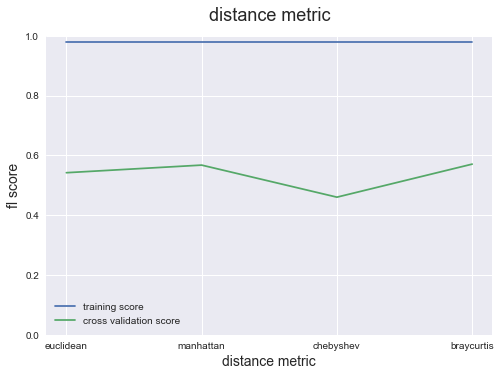

In [30]:
####KNN Hyperparam 2####

metric = ['euclidean', 'manhattan', 'chebyshev', 'braycurtis'] #'mahalanobis'
#leaf_size = range(2,100)
clf = KNeighborsClassifier(algorithm = 'brute', metric='manhattan', weights='distance', n_neighbors=12)
    

train_scores, validation_scores = validation_curve(
estimator = clf,
param_name = 'metric',
param_range = metric,
X = x_hypertune,
y = y_hypertune, cv = 5,
scoring = 'f1',
n_jobs=5)

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

# print('Training scores:\n\n', train_scores)
# print('\n', '-' * 70) # separator to make the output easy to read
# print('\nValidation scores:\n\n', validation_scores)

plt.style.use('seaborn')
plt.plot(metric, train_scores_mean, label = training_score)
plt.plot(metric, validation_scores_mean, label = cross_validation_score)
plt.ylabel(y_label, fontsize = 14)
plt.xlabel('distance metric', fontsize = 14)
plt.title('distance metric', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.0,1.0)

In [34]:
####model FINAL TEST 5 ####################
#######FINAL FOR KNN ######################

clf = KNeighborsClassifier(algorithm = 'brute', metric='braycurtis',  weights='distance', n_neighbors = 20)
clf.fit(x_train, y_train)  
#y_pred_val = clf.predict(x_val1)
y_pred_test = clf.predict(x_test)

#print("Accuracy validation set:",metrics.accuracy_score(y_val, y_pred_val))
print("Accuracy test set:",metrics.accuracy_score(y_test, y_pred_test))

metrics.classification_report(y_test, y_pred_test, output_dict = True)

Accuracy test set: 0.8287722650651743


{'0': {'precision': 0.8614879096806808,
  'recall': 0.9220018034265104,
  'f1-score': 0.890718236857006,
  'support': 11090},
 '1': {'precision': 0.6892959770114943,
  'recall': 0.538591074936851,
  'f1-score': 0.6046951315582165,
  'support': 3563},
 'accuracy': 0.8287722650651743,
 'macro avg': {'precision': 0.7753919433460875,
  'recall': 0.7302964391816806,
  'f1-score': 0.7477066842076112,
  'support': 14653},
 'weighted avg': {'precision': 0.8196179952535797,
  'recall': 0.8287722650651743,
  'f1-score': 0.8211693168966165,
  'support': 14653}}